In [1]:
import seaborn as sns
import pandas as pd


In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head() #show first rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#tips.day.unique() #days of data

tips.time.unique() #times of data

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [6]:
tips.tail() # last rows

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


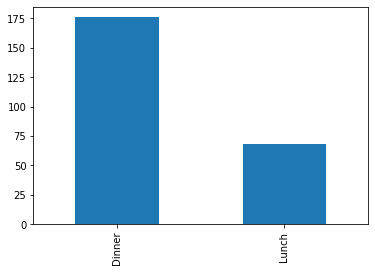

In [10]:
tips.time.value_counts().plot(kind='bar') # plot how many time data for each category

In [11]:
tips.time.value_counts(normalize = True) # % of dinner and lunch

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [14]:
tips.groupby(['time'])['tip'].mean()
# group by time, mean of tips - which time has bigger tips

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

In [18]:
sex = tips.groupby(['sex'])['tip'].mean()
smoker = tips.groupby(['smoker'])['tip'].mean()

print(sex)
print('')
print(smoker)

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64


In [19]:
#cross table for smoker and tips
tips.groupby(['smoker', 'sex'])['tip'].mean() #groupby with two dimensions

smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

In [20]:
#use of unstack for more clean data
tips.groupby(['smoker', 'sex'])['tip'].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


In [22]:
tips['tip_pct'] = tips.tip / tips.total_bill #create new column with % tips to total bill

In [23]:
tips.head() #check new column

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


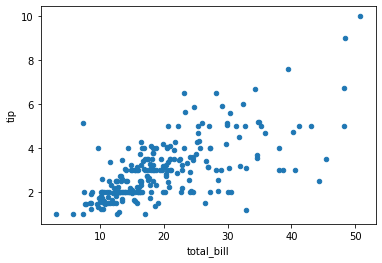

In [24]:
# visualize relation between total bill and tip
tips.plot.scatter(x = 'total_bill', y = 'tip')

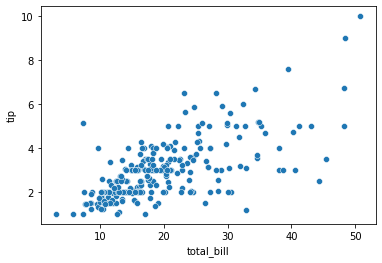

In [25]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

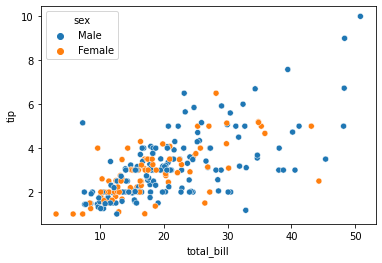

In [26]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex') # color by sex
# sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'time') # color by time

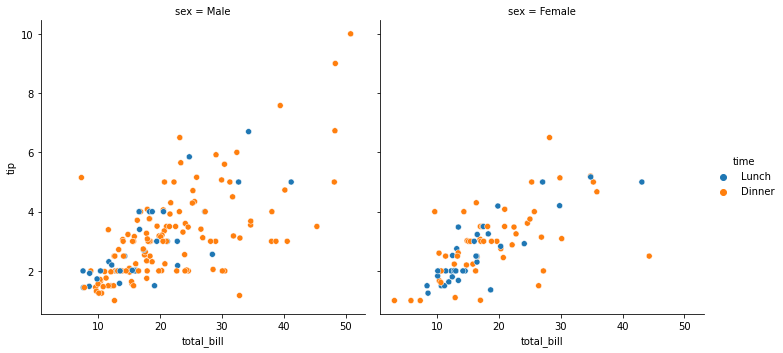

In [27]:
#bifurcation of time based on sex
sns.relplot(x = 'total_bill', y = 'tip', data = tips, col = 'sex', hue = 'time')

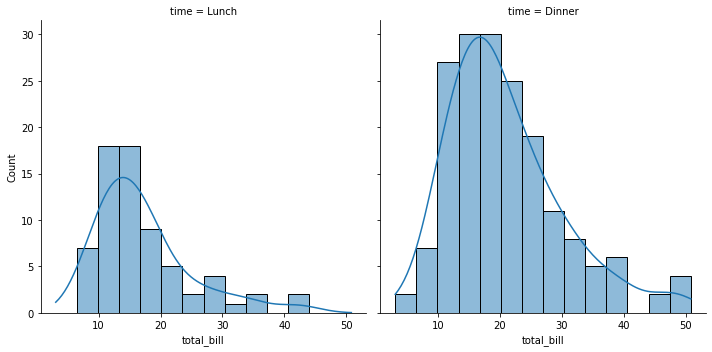

In [31]:
#distribution of total bill by time
sns.displot(x = 'total_bill', data = tips, col = 'time', kde = True)

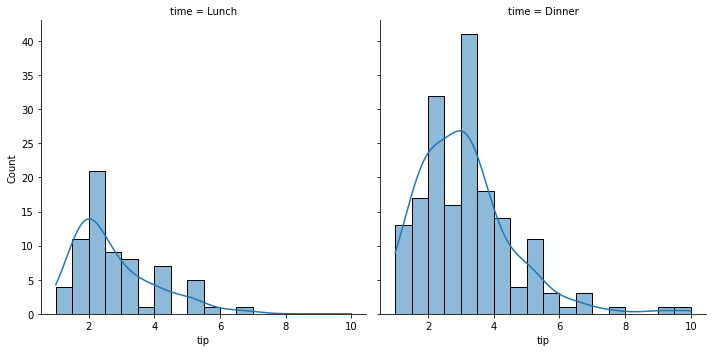

In [32]:
#distribution of tip by time
sns.displot(x = 'tip', data = tips, col = 'time', kde = True)

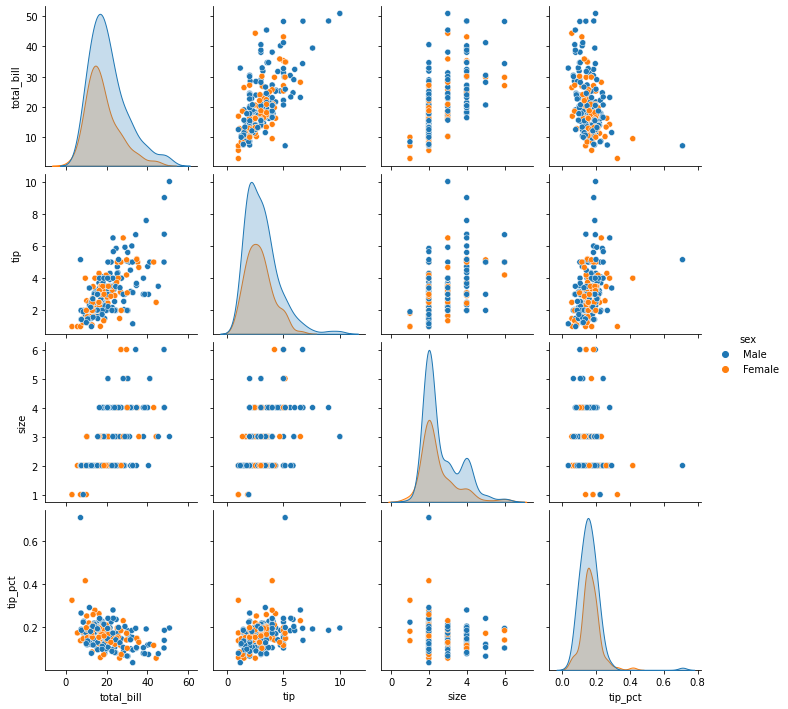

In [33]:
sns.pairplot(data = tips, hue = 'sex')